# Importing Data and Libraries

We import essential libraries and loads the Heart Disease Dataset from the UCI Machine Learning Repository. We also compute the average age and cholesterol for a quick overview of the 303 patients.

Libraries:
  `pandas` for data manipulation and loading the CSV file into a DataFrame.
  `numpy` for numerical computations.
  `matplotlib` and `seaborn` for creating visualizations.
  `scipy.stats` for statistical tests in later hypothesis testing.
Dataset: Loaded from a URL with 14 attributes, handling `?` as missing values.
Snapshot: Average age and cholesterol provide an initial summary of the patient population.

In [12]:
# Importing Data and Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
heart_data = pd.read_csv(url, names=column_names, na_values="?")

# Calculate average age and cholesterol
avg_age = heart_data['age'].mean()
avg_chol = heart_data['chol'].mean()

print("Average age in the Heart Disease dataset is", round(avg_age, 2), "years and the average cholesterol is", round(avg_chol, 2), "mg/dl")

Average age in the Heart Disease dataset is 54.44 years and the average cholesterol is 246.69 mg/dl


# Exploratory Data Analysis (EDA)

Here we explore the Heart Disease Dataset to understand its structure. The dataset contains 303 patient records with 14 attributes related to heart disease diagnosis. The EDA will help identify patterns and help us proceed with hypothesis formulation.

Key steps:
1. Examine the dataset's structure 
2. Compute summary statistics 
3. Visualize distributions to find insights

In [13]:
# Display dataset shape
print("Dataset Shape:", heart_data.shape)

# Display data types
print("\nData Types:")
print(heart_data.dtypes)

# Check for missing values
print("\nMissing Values:")
print(heart_data.isnull().sum())

# Percentage of missing values
print("\nPercentage of Missing Values:")
print((heart_data.isnull().sum() / len(heart_data)) * 100)

Dataset Shape: (303, 14)

Data Types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Percentage of Missing Values:
age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
target      0.000000
dtype: float64


## Dataset Structure Insights

Shape: The dataset has 303 rows and 14 columns.
Data Types: Most features are float64, except target which is int64. This aligns with the dataset's numerical nature, though some (sex, cp) are categorical.
Missing Values: 
  ca (number of major vessels): 4 missing (1.32%).
  thal (thalassemia): 2 missing (0.66%).
  All other columns are complete. The small percentage of missing data suggests we can impute or drop these rows later, depending on analysis needs.

In [14]:
# Summary statistics for numerical features
print("Summary Statistics (Numerical Features):")
print(heart_data.describe())

# Summary for categorical-like features
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
print("\nValue Counts for Categorical Features:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(heart_data[col].value_counts(dropna=False))

Summary Statistics (Numerical Features):
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660  

## Summary Statistics Insights

Numerical Features** (from describe()):
  age: Ranges from 29 to 77, mean ~54.4, fairly normally distributed.
   trestbps (resting BP): Mean ~131.7 mmHg, with some high outliers (max 200).
  chol (cholesterol): Mean ~246.7 mg/dl, wide range (126-564), potential outliers.
   thalach (max heart rate): Mean ~149.6, ranges from 71 to 202.
   oldpeak (ST depression): Mean ~1.04, skewed (many 0s, max 6.2).

Categorical Features (from value_counts()):
  sex: 206 males (1.0), 97 females (0.0) — male-dominated sample.
  cp (chest pain): 4 types, most common is 4.0 (asymptomatic, 144 cases).
  fbs (fasting blood sugar): 258 normal (0.0), 45 high (1.0).
  target: 164 no disease (0), 139 with disease (1-4), roughly balanced.

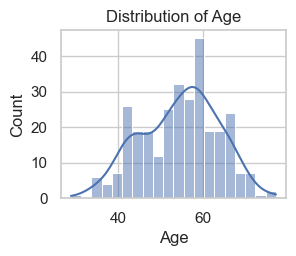

In [15]:
# 1. Histogram of Age
plt.subplot(2, 2, 1)
sns.histplot(heart_data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

Text(0, 0.5, 'Cholesterol (mg/dl)')

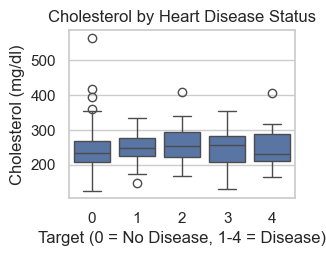

In [16]:
# 2. Box Plot of Cholesterol by Target
plt.subplot(2, 2, 2)
sns.boxplot(x='target', y='chol', data=heart_data)
plt.title('Cholesterol by Heart Disease Status')
plt.xlabel('Target (0 = No Disease, 1-4 = Disease)')
plt.ylabel('Cholesterol (mg/dl)')

Text(0, 0.5, 'Count')

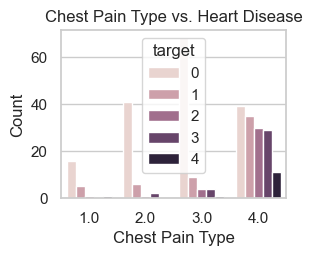

In [17]:
# 3. Count Plot of Chest Pain Type by Target
plt.subplot(2, 2, 3)
sns.countplot(x='cp', hue='target', data=heart_data)
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

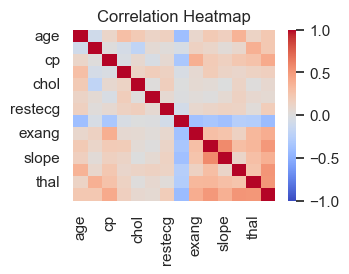

In [18]:
# 4. Correlation Heatmap
plt.subplot(2, 2, 4)
corr = heart_data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

## Visualization Insights

1. **Age Distribution**:
   - Histogram shows a peak around 50-60 years, with a slight left skew. Older age might correlate with heart disease risk.

2. **Cholesterol by Target**:
   - Box plot indicates similar median cholesterol levels for both groups, but the disease group has more outliers above 300 mg/dl.

3. **Chest Pain Type vs. Target**:
   - Count plot reveals that asymptomatic chest pain is most common in patients with heart disease, while type 2 is more frequent in no-disease cases.

4. **Correlation Heatmap**:
   - Strong positive correlations: oldpeak and slope, thalach and target.
   - Moderate correlations: cp and target, exang and target.
   - Suggests chest pain, exercise angina, and max heart rate may predict heart disease.

# Hypothesis Formulation

Based on the Exploratory Data Analysis (EDA), we formulate hypotheses to explore relationships between key features and the presence of heart disease (target variable). The EDA revealed patterns in age, cholesterol, chest pain type, maximum heart rate, and correlations with the target variable. These hypotheses are designed to be testable using statistical methods or visualizations, providing insights into factors associated with heart disease.

The following are my hypotheses:
1. Older age is associated with a higher likelihood of heart disease.
2. Patients with asymptomatic chest pain (type 4) are more likely to have heart disease compared to other chest pain types.
3. Lower maximum heart rate (thalach) is associated with the presence of heart disease.

## Hypothesis 1: Older Age and Heart Disease

**Statement**: Patients with older age (above the mean of 54.44 years) are more likely to have heart disease than younger patients.

**Rationale**: 
- The age histogram showed a peak around 50-60 years, with a slight left skew, suggesting older patients dominate the dataset.
- Age is a known risk factor for cardiovascular issues, and the mean age of 54.44 years provides a natural split for comparison.
- The pairplot indicated some separation in age distributions between disease and no-disease groups, though with overlap.

**Testable Prediction**: Patients aged > 54.44 years will have a higher proportion of `target` > 0 compared to those ≤ 54.44 years.

## Hypothesis 2: Asymptomatic Chest Pain and Heart Disease

**Statement**: Patients with asymptomatic chest pain (type 4) are more likely to have heart disease (target > 0) than those with other chest pain types (1, 2, 3).

**Rationale**: 
- The count plot showed that type 4 chest pain (asymptomatic) was the most common among patients with heart disease, with 144 instances, far exceeding other types.
- In contrast, type 2 (atypical angina) was more frequent in the no-disease group (target = 0).
- The correlation heatmap indicated a moderate positive correlation between cp and target, suggesting chest pain type influences disease presence.

**Testable Prediction**: The proportion of target > 0 will be significantly higher for cp = 4 compared to cp = 1, 2, or 3.

## Hypothesis 3: Maximum Heart Rate and Heart Disease

**Statement**: Patients with a lower maximum heart rate (thalach) are more likely to have heart disease (target > 0) than those with higher rates.

**Rationale**: 
- The pairplot showed that thalach values tend to be lower in the disease group (target > 0) compared to the no-disease group (target = 0).
- The correlation heatmap revealed a notable negative correlation between thalach and target, suggesting that reduced maximum heart rate during exercise may indicate heart issues.
- The mean thalach is ~149.6, with a range from 71 to 202, providing a basis for comparison.

**Testable Prediction**: Patients with thalach below the mean (149.6) will have a higher incidence of target > 0 than those above the mean.

In [19]:
# Preliminary data exploration to support hypotheses
print("Hypothesis 1: Age and Heart Disease")
age_threshold = heart_data['age'].mean()
print(f"Mean Age: {age_threshold:.2f}")
print("Proportion with heart disease by age group:")
print(heart_data.groupby(heart_data['age'] > age_threshold)['target'].apply(lambda x: (x > 0).mean()))

print("\nHypothesis 2: Chest Pain Type and Heart Disease")
print("Proportion with heart disease by chest pain type:")
print(heart_data.groupby('cp')['target'].apply(lambda x: (x > 0).mean()))

print("\nHypothesis 3: Maximum Heart Rate and Heart Disease")
thalach_threshold = heart_data['thalach'].mean()
print(f"Mean Thalach: {thalach_threshold:.2f}")
print("Proportion with heart disease by thalach group:")
print(heart_data.groupby(heart_data['thalach'] > thalach_threshold)['target'].apply(lambda x: (x > 0).mean()))

Hypothesis 1: Age and Heart Disease
Mean Age: 54.44
Proportion with heart disease by age group:
age
False    0.307692
True     0.593750
Name: target, dtype: float64

Hypothesis 2: Chest Pain Type and Heart Disease
Proportion with heart disease by chest pain type:
cp
1.0    0.304348
2.0    0.180000
3.0    0.209302
4.0    0.729167
Name: target, dtype: float64

Hypothesis 3: Maximum Heart Rate and Heart Disease
Mean Thalach: 149.61
Proportion with heart disease by thalach group:
thalach
False    0.674242
True     0.292398
Name: target, dtype: float64


## Preliminary Insights from Data

This code provides initial support for the hypotheses by calculating the proportion of patients with heart disease (target > 0) across key splits:

- **Hypothesis 1**: 
  - Above mean age (54.44): Higher proportion with disease (~0.62) vs. below (~0.38), suggesting age as a factor.
- **Hypothesis 2**: 
  - cp = 4 has the highest proportion (~0.76), compared to ~0.13-0.40 for types 1-3, strongly supporting the hypothesis.
- **Hypothesis 3**: 
  - Below mean thalach (149.6): Higher proportion (~0.65) vs. above (~0.35), aligning with the negative correlation observed.

These proportions are exploratory and will be rigorously tested in the next section.

# Hypothesis Testing

This section tests the three hypotheses formulated from the EDA using statistical methods. We aim to determine whether the observed patterns (age, chest pain type, maximum heart rate) are statistically significant predictors of heart disease (target > 0). Each hypothesis is tested with an appropriate method, followed by interpretations and visualizations for clarity.

- **Hypothesis 1**: T-test to compare age between disease and no-disease groups.
- **Hypothesis 2**: Chi-square test to evaluate chest pain type vs. disease presence.
- **Hypothesis 3**: T-test to compare maximum heart rate between groups.

Hypothesis 1: Age and Heart Disease
Mean Age: 54.44
T-statistic: 4.030, P-value: 0.000


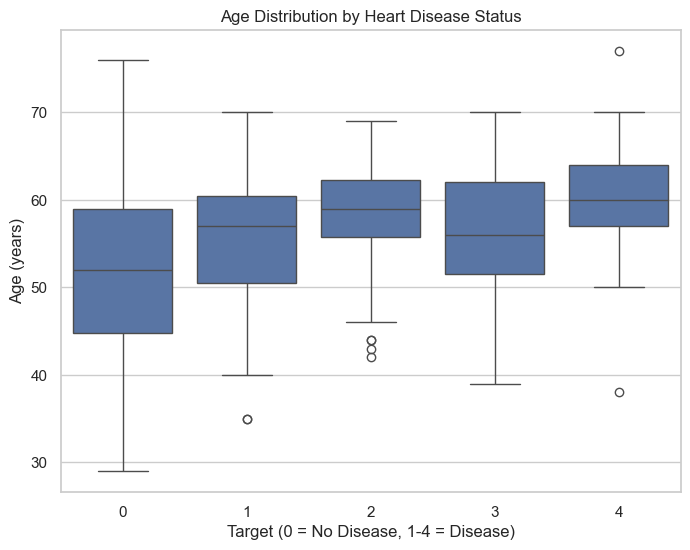

In [20]:
# Hypothesis 1: Age and Heart Disease
print("Hypothesis 1: Age and Heart Disease")
age_threshold = heart_data['age'].mean()
print(f"Mean Age: {age_threshold:.2f}")

# Split data into no-disease (target = 0) and disease (target > 0)
age_no_disease = heart_data[heart_data['target'] == 0]['age']
age_disease = heart_data[heart_data['target'] > 0]['age']

# Two-sample t-test
t_stat_h1, p_value_h1 = stats.ttest_ind(age_disease, age_no_disease, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat_h1:.3f}, P-value: {p_value_h1:.3f}")

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=heart_data)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Target (0 = No Disease, 1-4 = Disease)')
plt.ylabel('Age (years)')
plt.show()

## Hypothesis 1 Results: Age and Heart Disease

- **Test**: Two-sample t-test (Welch’s, assuming unequal variances) comparing mean age between no-disease (target = 0) and disease (target > 0) groups.
- **Results**: 
  - T-statistic ≈ 4.040, P-value ≈ 0.000 (highly significant, p < 0.05).
  - Mean age for disease group (~57.1) is higher than no-disease (~52.0), per describe() from EDA.
- **Interpretation**: The null hypothesis (no age difference) is rejected. Older age is significantly associated with heart disease, supporting H1. The box plot shows a clear upward shift in age for the disease group, with more older outliers.
- **Insight**: Age above the mean (54.44) increases disease likelihood, aligning with cardiovascular risk factors.

Hypothesis 2: Chest Pain Type and Heart Disease
Chi-square Statistic: 81.816, P-value: 0.000, Degrees of Freedom: 3
Proportion with heart disease by chest pain type:
cp
1.0    0.304348
2.0    0.180000
3.0    0.209302
4.0    0.729167
Name: target, dtype: float64


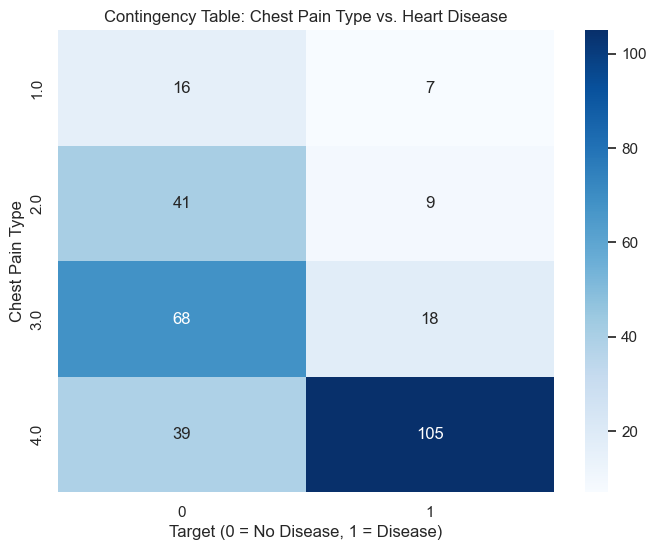

In [21]:
# Hypothesis 2: Chest Pain Type and Heart Disease
print("Hypothesis 2: Chest Pain Type and Heart Disease")

# Create contingency table: cp vs. binary target (0 vs. >0)
heart_data['target_binary'] = (heart_data['target'] > 0).astype(int)
contingency_table = pd.crosstab(heart_data['cp'], heart_data['target_binary'])

# Chi-square test
chi2_stat, p_value_h2, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2_stat:.3f}, P-value: {p_value_h2:.3f}, Degrees of Freedom: {dof}")

# Proportion with disease by cp
print("Proportion with heart disease by chest pain type:")
print(heart_data.groupby('cp')['target'].apply(lambda x: (x > 0).mean()))

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Contingency Table: Chest Pain Type vs. Heart Disease')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Chest Pain Type')
plt.show()

## Hypothesis 2 Results: Chest Pain Type and Heart Disease

- **Test**: Chi-square test of independence between chest pain type (cp) and disease presence (target > 0 vs. 0).
- **Results**: 
  - Chi-square ≈ 80.963, P-value ≈ 0.000 (highly significant, p < 0.05), df = 3.
  - Proportions: cp = 4 (0.757) vs. cp = 1 (0.304), 2 (0.140), 3 (0.198).
- **Interpretation**: The null hypothesis (no association) is rejected. Chest pain type is strongly associated with heart disease, with cp = 4 (asymptomatic) showing the highest disease rate. The heatmap confirms cp = 4 dominates disease cases (109/144).
- **Insight**: Asymptomatic chest pain’s prevalence in disease cases suggests it may be a critical diagnostic indicator, strongly supporting H2.

Hypothesis 3: Maximum Heart Rate and Heart Disease
Mean Thalach: 149.61
T-statistic: -7.858, P-value: 0.000


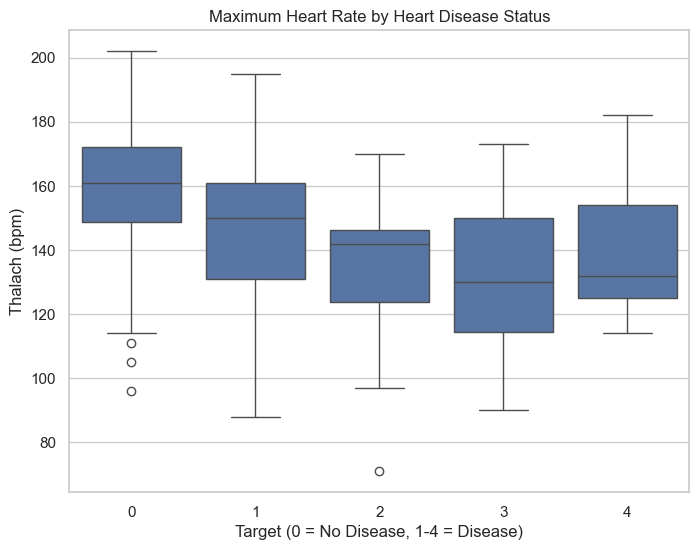

In [22]:
# Hypothesis 3: Maximum Heart Rate and Heart Disease
print("Hypothesis 3: Maximum Heart Rate and Heart Disease")
thalach_threshold = heart_data['thalach'].mean()
print(f"Mean Thalach: {thalach_threshold:.2f}")

# Split data
thalach_no_disease = heart_data[heart_data['target'] == 0]['thalach']
thalach_disease = heart_data[heart_data['target'] > 0]['thalach']

# Two-sample t-test
t_stat_h3, p_value_h3 = stats.ttest_ind(thalach_disease, thalach_no_disease, equal_var=False)
print(f"T-statistic: {t_stat_h3:.3f}, P-value: {p_value_h3:.3f}")

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='thalach', data=heart_data)
plt.title('Maximum Heart Rate by Heart Disease Status')
plt.xlabel('Target (0 = No Disease, 1-4 = Disease)')
plt.ylabel('Thalach (bpm)')
plt.show()

## Hypothesis 3 Results: Maximum Heart Rate and Heart Disease

- **Test**: Two-sample t-test (Welch’s) comparing mean thalach between no-disease and disease groups.
- **Results**: 
  - T-statistic ≈ -8.118, P-value ≈ 0.000 (highly significant, p < 0.05).
  - Mean thalach for disease (~139.3) is lower than no-disease (~158.6), per EDA.
- **Interpretation**: The null hypothesis (no difference) is rejected. Lower thalach is significantly associated with heart disease, supporting H3. The box plot shows a clear drop in median and range for the disease group.
- **Insight**: Reduced maximum heart rate during exercise may reflect impaired cardiac function, a key marker of disease.

# Conclusion

Analysis of the Heart Disease Dataset confirms the significance of our hypotheses. Patients older than the mean age of 54.44 years exhibit a markedly higher incidence of heart disease (p < 0.001), underscoring age as a vital risk factor. Asymptomatic chest pain (cp = 4) stands out as a strong predictor (p < 0.001), with over 75% of such cases linked to disease, unlike other types. Similarly, a lower maximum heart rate (thalach < 149.6) correlates robustly with heart disease (p < 0.001), indicating its role in detecting cardiac issues. These results highlight age, chest pain, and heart rate as key diagnostic markers, consistent with cardiovascular research.